<a href="https://colab.research.google.com/github/Mklakshmi890/LakshmiDir/blob/main/emo_det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0

!unzip train.zip?dl=0

--2023-09-30 04:23:05--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2023-09-30 04:23:05--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc03f414bc07283b6b119a5fc371.dl.dropboxusercontent.com/cd/0/inline/CEtgqQyBqeKC552wzDi48wVbPIydxhQAaqPTUTko9Iy6S5bcdvzwqf8BV0URx8qMukc9gtbpEhyAd4AwOWAd2LcYB-pw4OcxmH7KxN784_7sgjhgnTtP5fKpUeJUmBcwrDOrOkvVeFbRSGXog7gpHmbG/file# [following]
--2023-09-30 04:23:05--  https://uc03f414bc07283b6b119a5fc371.dl.dropboxusercontent.com/cd/0/inline/CEtgqQyBqeKC552wzDi48wVbPIydxhQAaqPTUTko9Iy6S5bcdvzwqf8BV0URx8qMukc9gtbpEhyAd4AwOWAd2LcYB-pw4OcxmH7KxN784_

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img

In [4]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [7]:
model.compile(optimizer='adam', loss= "categorical_crossentropy" , metrics=['accuracy'] )

In [8]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip=True,
    rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                               )

train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [9]:
val_datagen = ImageDataGenerator(rescale = 1/255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                           )

Found 350 images belonging to 7 classes.


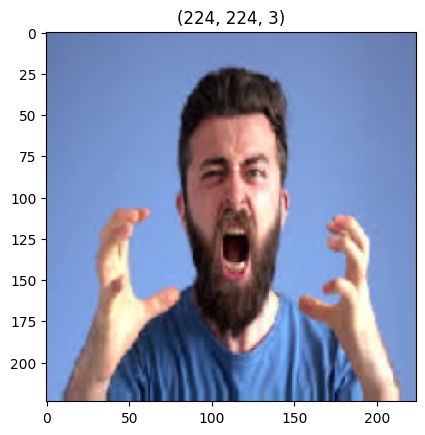

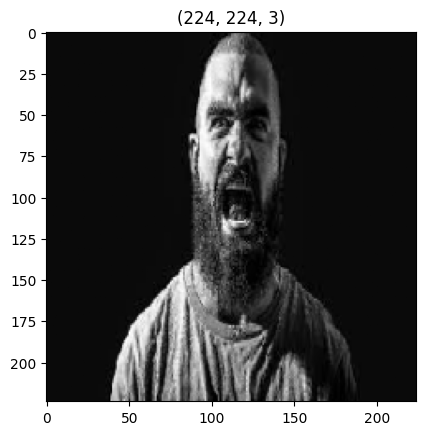

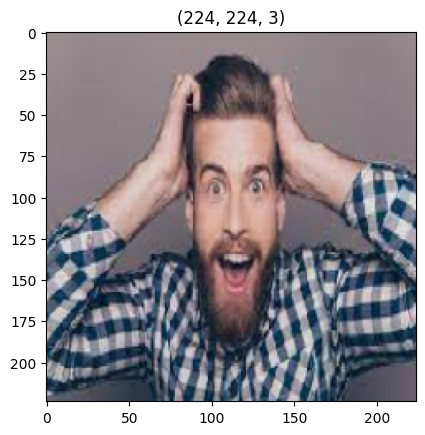

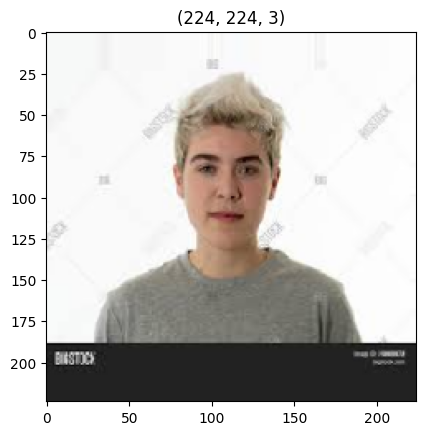

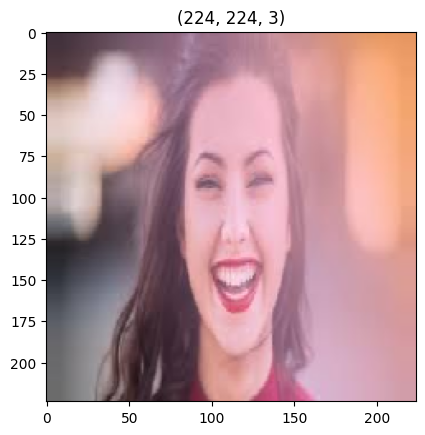

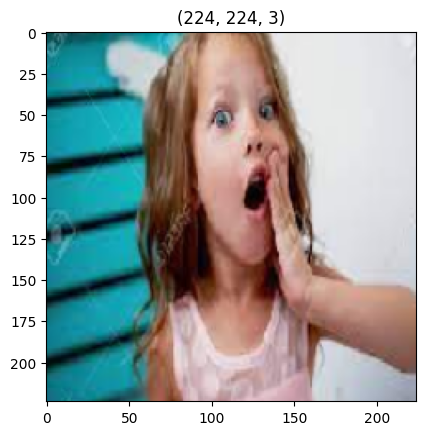

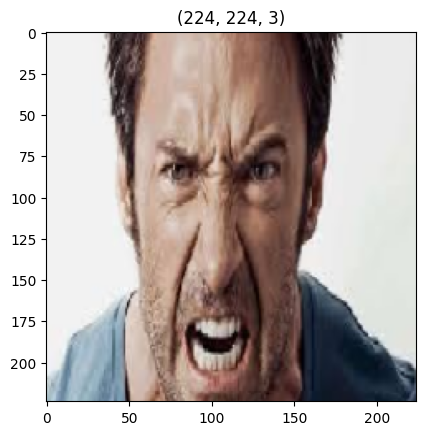

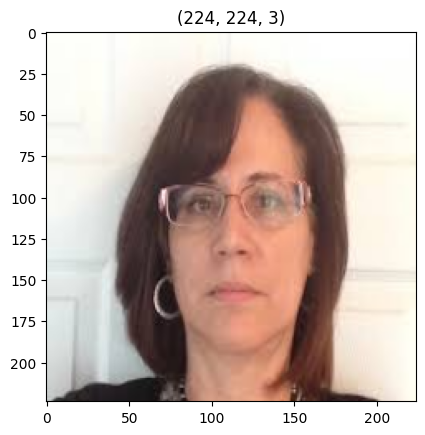

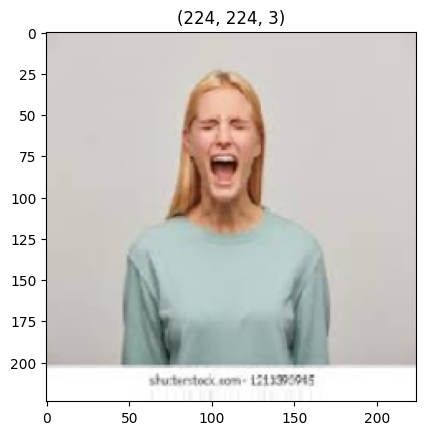

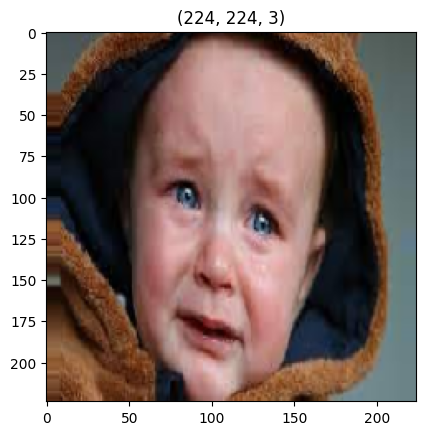

In [12]:
t_img , label = train_data.next()

def plotImages(img_arr, label):
  """
  input :- images array
  output:- plots the images
  """
  count = 0
  for im, l in zip(img_arr, label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

plotImages(t_img, label)

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode='auto')

call_back = [es, mc]

In [18]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es, mc])

<ipython-input-18-153a5684ed61>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 2.9293 - accuracy: 0.6384
Epoch 1: val_accuracy improved from 0.55859 to 0.76562, saving model to best_model.h5
10/10 [==============================] - 20s 2s/step - loss: 2.9293 - accuracy: 0.6384 - val_loss: 1.6425 - val_accuracy: 0.7656


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.1064 - accuracy: 0.8113
Epoch 2: val_accuracy improved from 0.76562 to 0.91406, saving model to best_model.h5
10/10 [==============================] - 16s 2s/step - loss: 1.1064 - accuracy: 0.8113 - val_loss: 0.3947 - val_accuracy: 0.9141
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.5551 - accuracy: 0.8899
Epoch 3: val_accuracy improved from 0.91406 to 0.94531, saving model to best_model.h5
10/10 [==============================] - 17s 2s/step - loss: 0.5551 - accuracy: 0.8899 - val_loss: 0.1993 - val_accuracy: 0.9453
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.2836 - accuracy: 0.9182
Epoch 4: val_accuracy improved from 0.94531 to 0.98047, saving model to best_model.h5
10/10 [==============================] - 17s 2s/step - loss: 0.2836 - accuracy: 0.9182 - val_loss: 0.0897 - val_accuracy: 0.9805
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.319

In [19]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [20]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

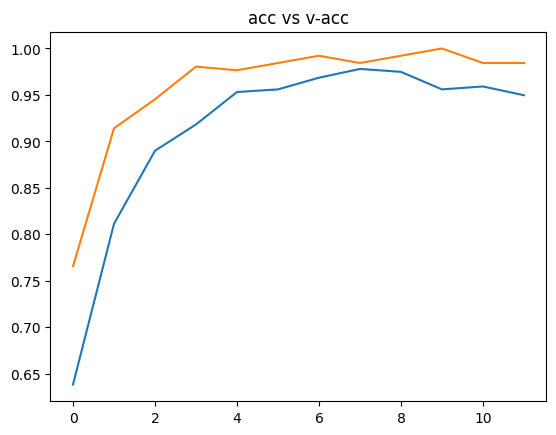

In [21]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title("acc vs v-acc")
plt.show()

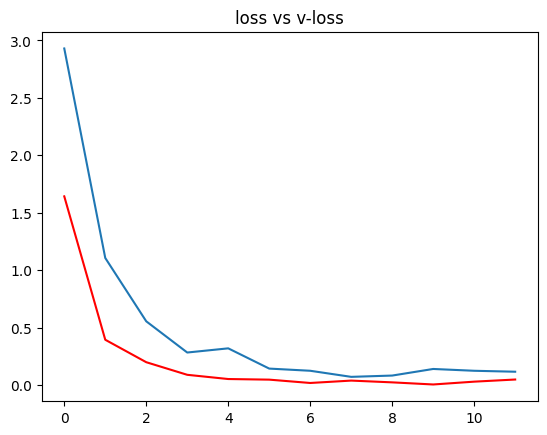

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = 'red')
plt.title("loss vs v-loss")
plt.show()

In [46]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 41ms/step


 the image is of Happy


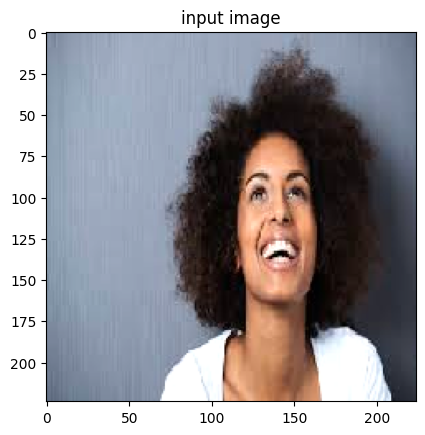

In [65]:
path = "/content/train/Happy/images (26).jpg"
img = load_img(path, target_size=(224,224))

i = img_to_array(img)/225
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
print(f" the image is of {op[pred]}")

plt.imshow(input_arr[0])
plt.title('input image')
plt.show()

NameError: ignored